## Genre EDA

**Description:**
The ‘Genre’ attribute in the Spotify dataset has too many values and looks confusing. We will try to make clusters according related music features and differentiate super-genres.
Technical Application
KMeans clustering, and possibly DBSCAN


#### load necessary packages

In [23]:
import numpy as np
import pandas as pd
from scipy import stats
import json

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

%matplotlib inline
import numpy as np

import plotly.express as px
import plotly.graph_objs as pgo
from plotly.subplots import make_subplots
from sklearn.manifold import TSNE
from wordcloud import WordCloud
from collections import Counter
import random
from math import floor


import warnings
warnings.filterwarnings("ignore")

#### Data Cleaning

In [24]:
data_w_genres = pd.read_csv('~/GmailDropBox/Dropbox/MScA/Data Mining/Final Project/data_w_genres.csv')

In [25]:
data_w_genres.head(5)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


**Convert track duration from milli seconds into minutes**

In [26]:
# Convert Milli secs duration into minutes
data_w_genres['duration_min'] = data_w_genres['duration_ms']/60000
data_w_genres['duration_min'] = data_w_genres['duration_min'].round(2)

data_w_genres['duration_min'].head()

0    4.45
1    4.79
2    5.48
3    4.38
4    4.51
Name: duration_min, dtype: float64

**Format artist and duration columns**

In [27]:
#Remove the Square Brackets from the artists

data_w_genres["artists"]=data_w_genres["artists"].str.replace("[", "")
data_w_genres["artists"]=data_w_genres["artists"].str.replace("]", "")
data_w_genres["artists"]=data_w_genres["artists"].str.replace("'", "")


In [28]:
data_w_genres['duration_min'] = data_w_genres['duration_ms']/60000
data_w_genres['duration_min'] = data_w_genres['duration_min'].round(2)

**Find duplicates**

In [29]:
data_w_genres.duplicated().any().sum()

0

In [30]:
data_w_genres.duration_min.sum()/(24*365*60)

0.2565040715372907

**Drop unnecessary columns**

In [31]:
# Store the data into df
df = data_w_genres

#Drop the columns
df.drop(['duration_ms'],inplace=True,axis=1)

# drop artist column
df.drop(['artists'],inplace=True,axis=1)

**Plot distribution for each music features**

<AxesSubplot:xlabel='mode', ylabel='Density'>

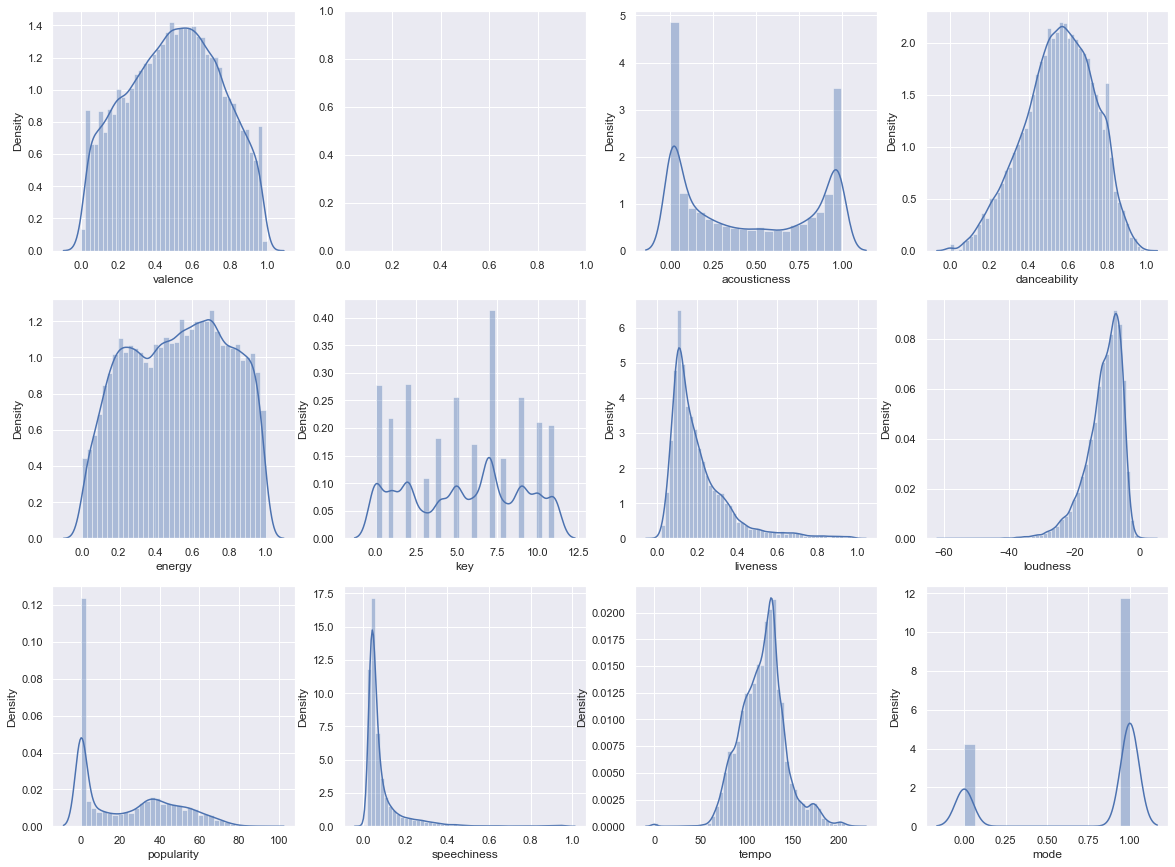

In [32]:
#Visualisation of Variability for each column in the dataframe
fig,ax = plt.subplots(3,4,figsize=(20,15))

sns.distplot(df['valence'],ax=ax[0,0])
#sns.distplot(df['year'],ax=ax[0,1])
sns.distplot(df['acousticness'],ax=ax[0,2])
sns.distplot(df['danceability'],ax=ax[0,3])
#sns.distplot(df['duration_min'],ax=ax[1,1])
sns.distplot(df['energy'],ax=ax[1,0])
sns.distplot(df['key'],ax=ax[1,1])
sns.distplot(df['liveness'],ax=ax[1,2])
sns.distplot(df['loudness'],ax=ax[1,3])
sns.distplot(df['popularity'],ax=ax[2,0])
sns.distplot(df['speechiness'],ax=ax[2,1])
sns.distplot(df['tempo'],ax=ax[2,2])
sns.distplot(df['mode'],ax=ax[2,3])


**Plot correlation of the music features**

<AxesSubplot:>

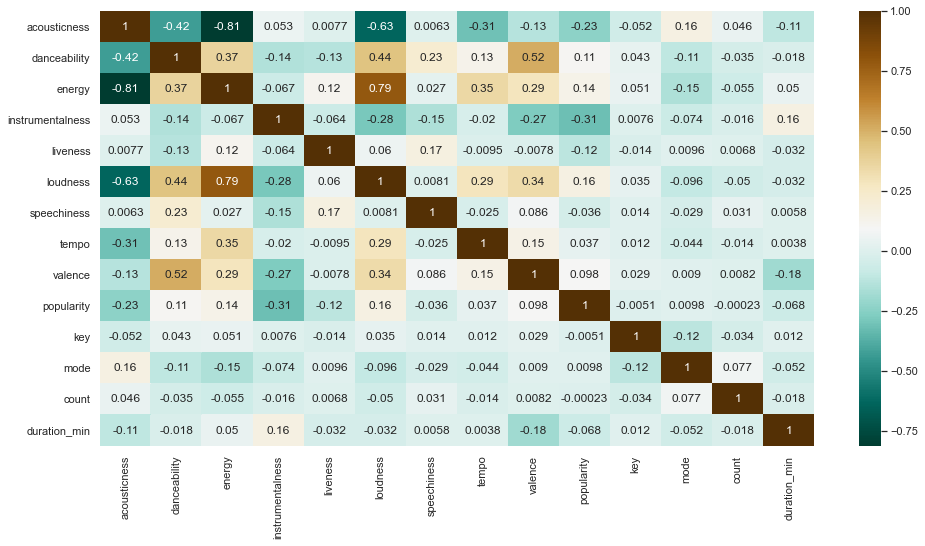

In [33]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r')

In [34]:
df.head()

,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres,duration_min
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes'],4.45
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[],4.79
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[],5.48
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[],4.38
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[],4.51


In [35]:
df.groupby('genres')['genres'].count().sort_values(ascending=False)

genres
[]                                                                                                                        13563
['movie tunes']                                                                                                              68
['show tunes']                                                                                                               53
['orchestral performance']                                                                                                   47
['hollywood']                                                                                                                46
                                                                                                                          ...  
['british folk', 'celtic', 'scottish fiddle', 'traditional british folk']                                                     1
['british folk', 'classic uk pop', 'new wave pop', 'scottish singer-songwriter']                 

Some of the songs might not contain any genre tags. We should remove those samples as they won’t play a part in our model building process.

In [36]:
df_new = df[~(df['genres'] == '[]')]

In [37]:
# get all genre tags in a list, and remove the ''

df_new['genres']=df_new['genres'].str.replace("'", "")
df_new['genres']=df_new['genres'].str.replace("[", "")
df_new['genres']=df_new['genres'].str.replace("]", "")
genres = df_new['genres']
genres
df_new

,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres,duration_min
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,show tunes,4.45
8,"""Weird Al"" Yankovic",0.186821,0.650792,0.693189,0.000045,0.160926,-9.691151,0.082275,132.876604,0.764585,32.867925,9,1,106,"comedy rock, comic, parody",3.64
10,$NOT,0.458167,0.826667,0.518667,0.000007,0.201683,-8.713167,0.272550,90.728833,0.426750,74.166667,0,1,6,"florida rap, underground hip hop, vapor trap",2.45
11,$atori Zoom,0.239000,0.883000,0.625000,0.000000,0.076500,-4.098000,0.245000,126.677000,0.871000,69.000000,6,1,2,"dark trap, meme rap",2.36
13,$uicideBoy$,0.154637,0.778551,0.625870,0.024720,0.209223,-6.553899,0.149986,117.679087,0.242772,65.333333,1,1,69,"dark trap, new orleans rap, underground hip hop",2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,黃品源,0.541000,0.578000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,47.000000,9,0,2,"c-pop, classic cantopop, classic mandopop, man...",4.90
32531,黑豹,0.381000,0.353000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,34.000000,11,1,2,"chinese indie, chinese indie rock",5.27
32532,龔詩嘉,0.134000,0.450000,0.782000,0.000000,0.063200,-5.905000,0.030600,87.980000,0.475000,17.000000,0,1,2,"singaporean mandopop, singaporean pop",3.07
32533,김수철,0.509000,0.456000,0.321000,0.000001,0.156000,-16.682000,0.031400,79.114000,0.210000,24.000000,4,0,2,classic korean pop,3.15


**Rank top 50 popular genres**

In [38]:
lst = []

for i in range(len(genres.values)):
    a = genres.values[i].split(', ')
    lst.append(a)

In [39]:
all_genres = sum(lst,[])
len(set(all_genres))

# We have 3231 unique music genres in the dataset

3231

In [40]:
import nltk

all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

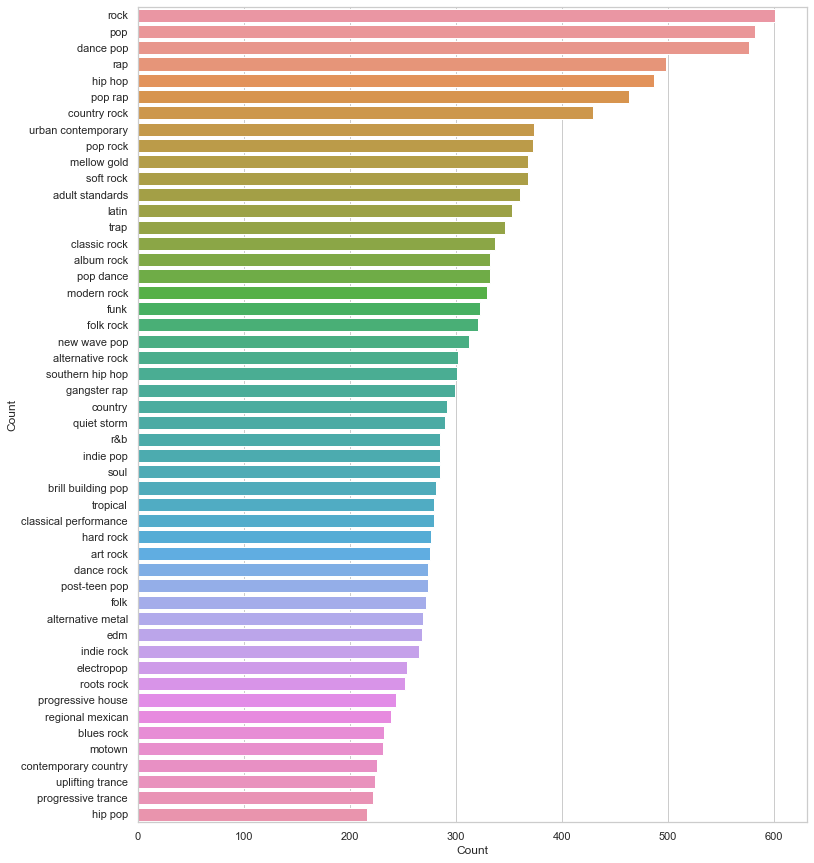

In [41]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

**Find most common words in genres**

In [47]:
genre_names_text = " ".join(df['genres'].tolist()).split(" ")
column_names = ["word","count"]
most_common_words_in_genres_df = pd.DataFrame([dict(zip(column_names,word_count)) for word_count in Counter(genre_names_text).most_common(30)])

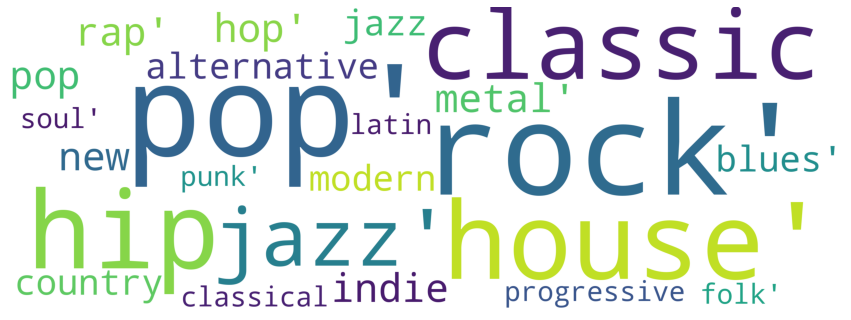

In [48]:
plt.subplots(figsize = (15,10))

wordcloud = WordCloud(background_color='white',
                      width = 2800,
                      height = 1024,
                      prefer_horizontal=1,
                      relative_scaling=1,
                      colormap = 'viridis').generate(" ".join(most_common_words_in_genres_df["word"].tolist()))

plt.imshow(wordcloud)
plt.axis('off') 
plt.show()

**Find the subgenres of each main genre groups**

In [56]:
pop_df = df[df["genres"].str.contains("pop")].sort_values("popularity").tail(10)
indie_df = df[df["genres"].str.contains("indie")].sort_values("popularity").tail(10)
rock_df = df[df["genres"].str.contains("rock")].sort_values("popularity").tail(10)
metal_df = df[df["genres"].str.contains("metal")].sort_values("popularity").tail(10)

fig = make_subplots(rows=4, cols=1,subplot_titles=('Pop', 'Indie', 'Rock','Metal'))

fig.add_trace(pgo.Bar(x=pop_df['popularity'],y=pop_df['genres'], orientation='h', marker_color='pink'), 1, 1)
fig.add_trace(pgo.Bar(x=indie_df['popularity'],y=indie_df['genres'], orientation='h', marker_color='green'), 2, 1)
fig.add_trace(pgo.Bar(x=rock_df['popularity'],y=rock_df['genres'], orientation='h', marker_color='red'), 3, 1)
fig.add_trace(pgo.Bar(x=metal_df['popularity'],y=metal_df['genres'], orientation='h', marker_color='black'), 4, 1)

fig.update_layout(height=1600,width=1600,showlegend=False,bargap=0.3,title_text='Most Popular Subgenres',)
fig.show()

**Plot correlation between music features and popularity**

In [45]:
feature_list = ['acousticness', 'energy', 'loudness', 'instrumentalness','danceability','speechiness','valence','tempo']
features = df[feature_list]

In [147]:
df_genre_corr = pd.DataFrame(df.corr()['popularity'][feature_list[:]]).reset_index().sort_values(by="popularity")
fig = px.bar(df_genre_corr, x="index", y="popularity", color="popularity", width=800, height=400)
fig.show()